In [69]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv(r"C:\Users\Alberto\Documents\AI Python course\Python\Machine learning\Mushrooms\mushrooms.csv")

**Imports**

In [100]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



#from sklearn.preprocessing import StandardScaler
#from sklearn.impute import KNNImputer
#from sklearn.feature_selection import SelectKBest

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
#from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import (accuracy_score, classification_report,ConfusionMatrixDisplay,
                             confusion_matrix, SCORERS)

**Utilities**

In [72]:
def give_learning_curve(model,X_train,y_train, scoring= 'f1_macro'):
    n, train_score, val_score = learning_curve(model, 
                                               X_train, 
                                               y_train,
                                               cv=5, 
                                               train_sizes=np.linspace(0.1, 1, 10), 
                                               scoring=scoring)

    lc = pd.DataFrame({'n': n,
                      'train score': train_score.mean(axis=1),
                      'test score': val_score.mean(axis=1)})
    display(lc)
    # plot:
    
    plt.figure(figsize=(8, 5))
    plt.title('Learning Curve')
    
    plt.plot(n, train_score.mean(axis=1), label='train score', color='orange')
    plt.plot(n, val_score.mean(axis=1), label='test score', color='green')
    
    plt.xlabel('n rows')
    plt.ylabel(scoring)
    plt.ylim([0,1.1])
    plt.legend()
    plt.show()
    pass



def give_confusion_report(model,X_test,y_test):
    
    pred_test = model.predict(X_test)
    cm = confusion_matrix(y_test, pred_test)
    
    CM = ConfusionMatrixDisplay(confusion_matrix=cm)
    CM.plot()
    plt.show()
    
    print(classification_report(y_test,pred_test))
    pass 


def give_f_imp(model, X_train):

    f_importance = pd.DataFrame({'feature_names': X_train.columns,
                                 'importance': model.feature_importances_})
    display(f_importance)

    plt.figure(figsize=(8, 5))
    plt.title('Feature importance')
    sns.barplot(data=f_importance, x='feature_names', y='importance')
    plt.xticks(rotation='vertical')
    plt.show()
    pass

**Preprocessing**

In [83]:
X = df.copy()
y = X.pop('class')

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.65, # 0.25 
                                                    random_state=4) # 4 arbirary , can be any integer
print(X_train.shape)
X_test.shape


(2843, 22)


(5281, 22)

In [74]:
X_train.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [84]:
X_train = X_train[['odor','spore-print-color']]
X_test = X_test[['odor','spore-print-color']]


In [85]:
enc = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
enc.fit(X_train)
X_train = enc.transform(X_train)
enc.fit(X_test)
X_test = enc.transform(X_test)

**DecisionTree, max depth = 3**

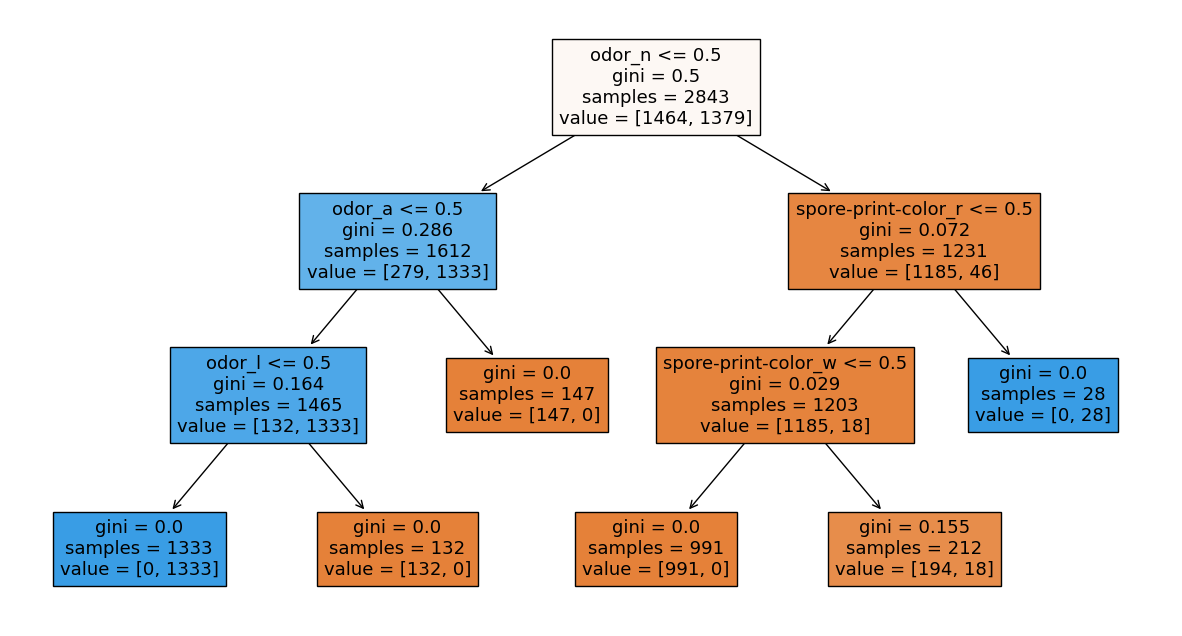

In [86]:
model = DecisionTreeClassifier(max_depth = 3) 

model.fit(X_train,y_train)

plt.figure(figsize=(15, 8))

plot_tree(model,
          feature_names=X_train.columns,
          filled=True)
plt.show()


,feature_names,importance
0,odor_a,0.159455
1,odor_c,0.000000
2,odor_f,0.000000
3,odor_l,0.173153
4,odor_m,0.000000
5,odor_n,0.627300
6,odor_p,0.000000
7,odor_s,0.000000
8,odor_y,0.000000
9,spore-print-color_b,0.000000


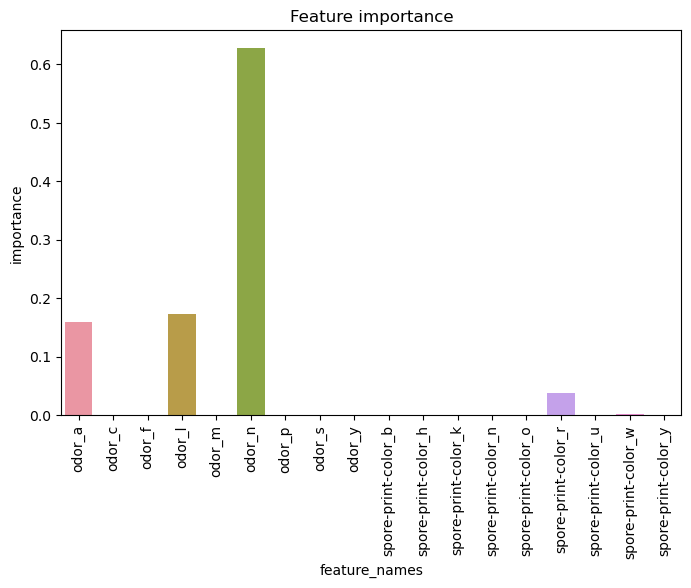

In [89]:
give_f_imp(model,X_train)

In [88]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)

print(score)

0.9943192577163416


,n,train score,test score
0,227,0.999119,0.99367
1,454,0.995595,0.99367
2,682,0.994135,0.99367
3,909,0.993839,0.99367
4,1137,0.992612,0.99367
5,1364,0.992815,0.99367
6,1591,0.992960,0.99367
7,1819,0.992853,0.99367
8,2046,0.993548,0.99367
9,2274,0.993668,0.99367


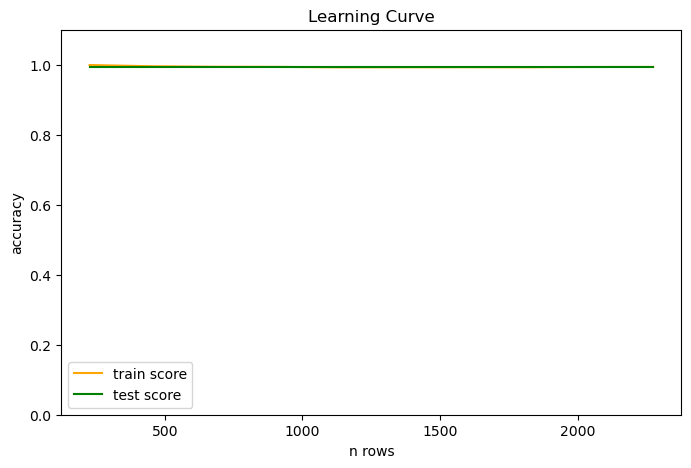

In [90]:
give_learning_curve(model, X_train,y_train, scoring='accuracy')

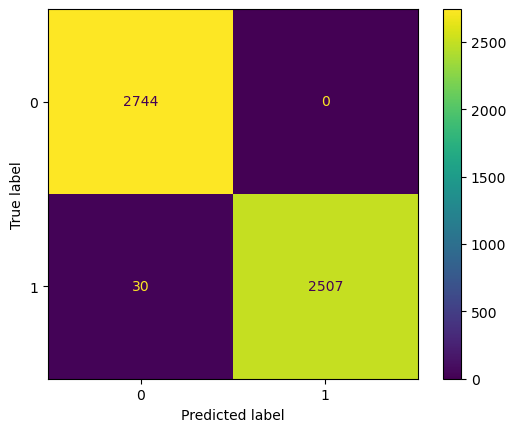

              precision    recall  f1-score   support

           e       0.99      1.00      0.99      2744
           p       1.00      0.99      0.99      2537

    accuracy                           0.99      5281
   macro avg       0.99      0.99      0.99      5281
weighted avg       0.99      0.99      0.99      5281



In [91]:
give_confusion_report(model,X_test,y_test)

**with cross validation grid search**

In [92]:
params = {'max_depth':np.arange(1,5)
          ,'min_samples_leaf':np.arange(2,10,3)}

scoring = 'accuracy' # f1_macro, precision_macro, recall_macro

grid = GridSearchCV(DecisionTreeClassifier()
                    ,param_grid=params
                    ,scoring=scoring)

grid.fit(X_train,y_train)

model = grid.best_estimator_
score = grid.best_score_

In [93]:
display(model)
print('score=',score)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

score= 0.9936700165845689


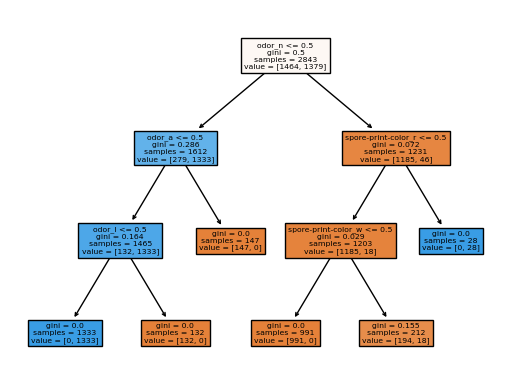

In [94]:
plot_tree(model,
          feature_names=X_train.columns,
          filled=True)
plt.show()

In [ ]:
give_f_imp(model,X_train)

,n,train score,test score
0,227,0.995595,0.985227
1,454,0.995595,0.993670
2,682,0.994135,0.993670
3,909,0.993839,0.993670
4,1137,0.992612,0.993670
5,1364,0.992815,0.993670
6,1591,0.992960,0.993670
7,1819,0.992853,0.993670
8,2046,0.993548,0.993670
9,2274,0.993668,0.993670


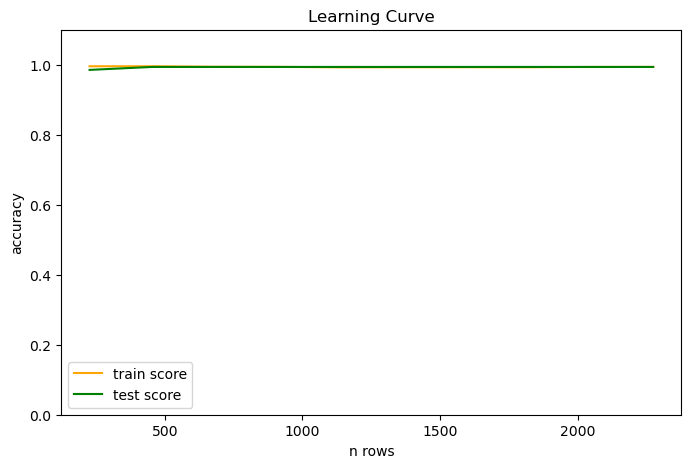

In [95]:
give_learning_curve(model,X_train,y_train,scoring=scoring)

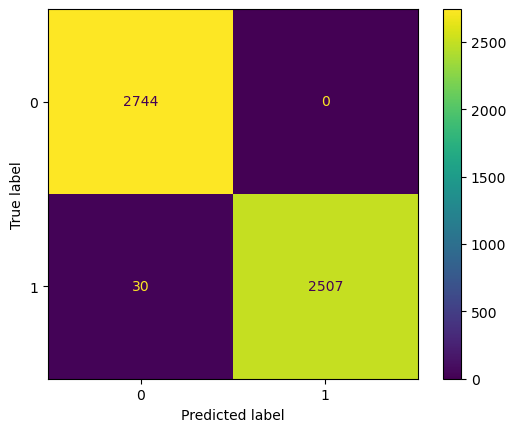

              precision    recall  f1-score   support

           e       0.99      1.00      0.99      2744
           p       1.00      0.99      0.99      2537

    accuracy                           0.99      5281
   macro avg       0.99      0.99      0.99      5281
weighted avg       0.99      0.99      0.99      5281



In [96]:
give_confusion_report(model,X_test,y_test)

**Random Forest**

In [104]:
clf = RandomForestClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)
RandomForestClassifier()
y_pred = clf.predict(X_test)


In [105]:
sum(y_pred == y_test)/len(y_pred)
#also: score = accuracy_score(y_test,y_pred)
print(score)

0.9936700165845689


,feature_names,importance
0,odor_a,0.159455
1,odor_c,0.000000
2,odor_f,0.000000
3,odor_l,0.173153
4,odor_m,0.000000
5,odor_n,0.627300
6,odor_p,0.000000
7,odor_s,0.000000
8,odor_y,0.000000
9,spore-print-color_b,0.000000


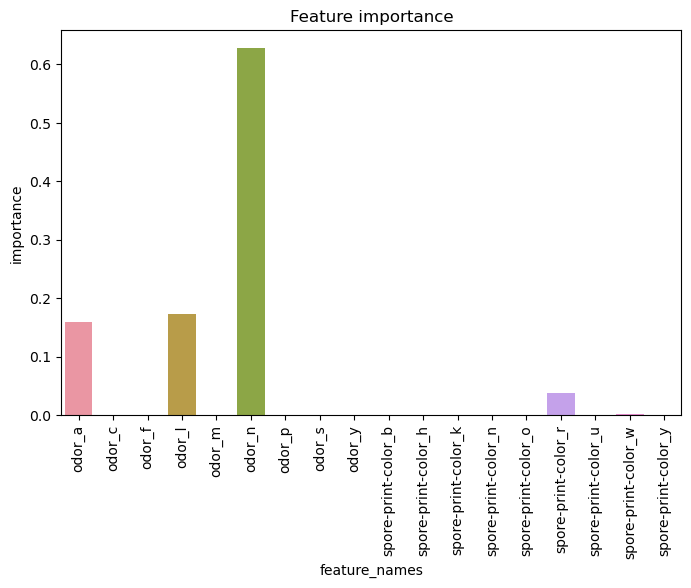

In [106]:
give_f_imp(model,X_train)

,n,train score,test score
0,227,0.986784,0.960256
1,454,0.982819,0.970456
2,682,0.979765,0.973971
3,909,0.970957,0.965171
4,1137,0.964996,0.960601
5,1364,0.966422,0.965522
6,1591,0.975110,0.968343
7,1819,0.976361,0.971506
8,2046,0.981036,0.979948
9,2274,0.981442,0.979948


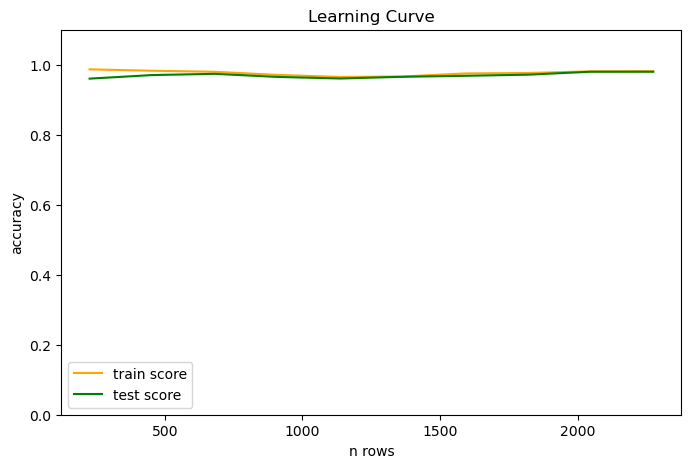

In [107]:
give_learning_curve(clf, X_train,y_train, scoring='accuracy')

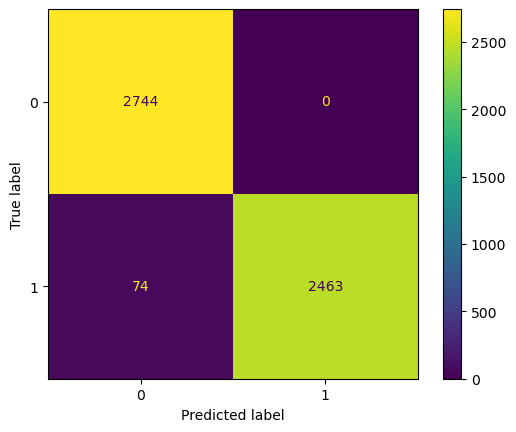

              precision    recall  f1-score   support

           e       0.97      1.00      0.99      2744
           p       1.00      0.97      0.99      2537

    accuracy                           0.99      5281
   macro avg       0.99      0.99      0.99      5281
weighted avg       0.99      0.99      0.99      5281



In [108]:
give_confusion_report(clf,X_test,y_test)

**With GridSearchCV**

In [110]:
params = {'max_depth':np.arange(1,6)
          ,'min_samples_leaf':np.arange(2,10,3)}

scoring = 'accuracy'

grid = GridSearchCV(RandomForestClassifier()
                    ,param_grid=params
                    ,scoring=scoring)

grid.fit(X_train,y_train)

model = grid.best_estimator_
score = grid.best_score_

In [111]:

display(model)
print(score)


RandomForestClassifier(max_depth=5, min_samples_leaf=5)

0.9894477586078864


,feature_names,importance
0,odor_a,0.032233
1,odor_c,0.035700
2,odor_f,0.163735
3,odor_l,0.028756
4,odor_m,0.000397
5,odor_n,0.323558
6,odor_p,0.030815
7,odor_s,0.033688
8,odor_y,0.037278
9,spore-print-color_b,0.000199


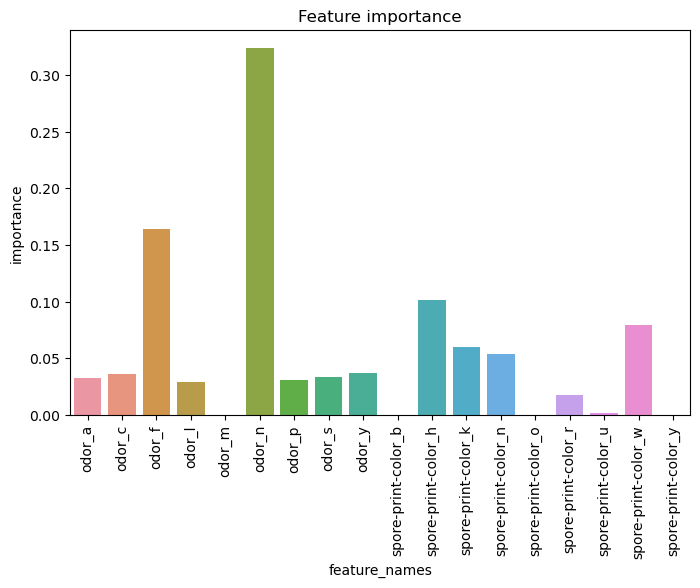

In [112]:
RandomForestClassifier()
y_pred = model.predict(X_test)
give_f_imp(model,X_train)

,n,train score,test score
0,227,0.964758,0.935277
1,454,0.981938,0.970456
2,682,0.986804,0.983821
3,909,0.986139,0.983821
4,1137,0.983113,0.983821
5,1364,0.984164,0.983821
6,1591,0.987555,0.987695
7,1819,0.984827,0.986633
8,2046,0.985728,0.985230
9,2274,0.993668,0.993670


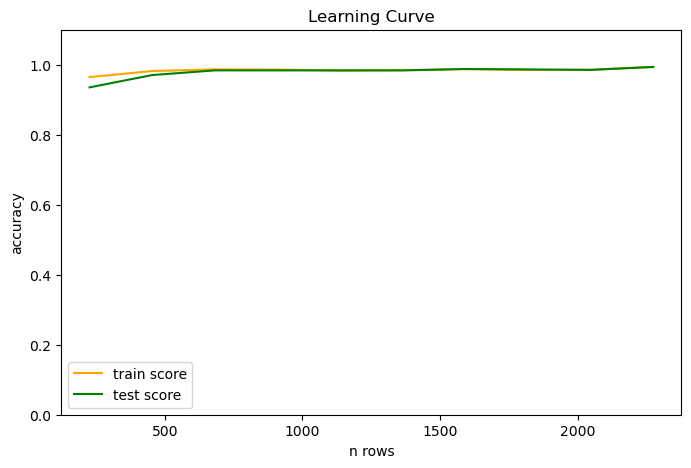

In [113]:
give_learning_curve(model,X_train,y_train,scoring=scoring)

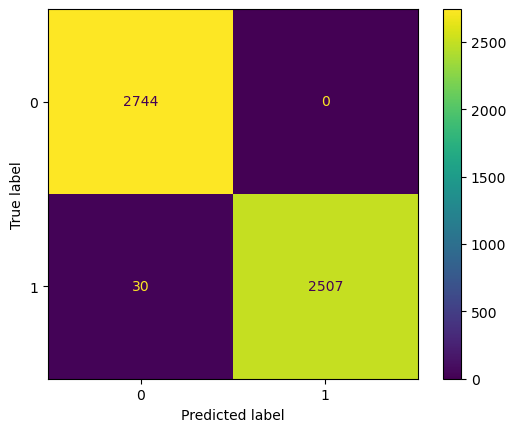

              precision    recall  f1-score   support

           e       0.99      1.00      0.99      2744
           p       1.00      0.99      0.99      2537

    accuracy                           0.99      5281
   macro avg       0.99      0.99      0.99      5281
weighted avg       0.99      0.99      0.99      5281



In [114]:
give_confusion_report(model,X_test,y_test)